In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#reading the food production dataset
food_production = pd.read_csv('Africa Food Production (2004 - 2013).csv')

In [3]:
#reading the food supply datasets
food_supply = pd.read_csv('Africa Food Supply (2004 - 2013).csv')


In [4]:
#viewing the first 5 records in the food production dataset
food_production.head()

,Country,Item,Year,Value
0,Algeria,Wheat and products,2004,2731
1,Algeria,Wheat and products,2005,2415
2,Algeria,Wheat and products,2006,2688
3,Algeria,Wheat and products,2007,2319
4,Algeria,Wheat and products,2008,1111


In [48]:
#viewing the first 5 records in the food production dataset
food_supply.head()

,Country,Year,Value
0,Algeria,2004,2987
1,Algeria,2005,2958
2,Algeria,2006,3047
3,Algeria,2007,3041
4,Algeria,2008,3048


In [5]:
#checking the shape of the food production data 
food_production.shape

(23110, 4)

In [46]:
#checking the shape of the food supply data 
food_supply.shape

(450, 3)

In [6]:
# checking the info of the food production data
food_production.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23110 entries, 0 to 23109
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  23110 non-null  object
 1   Item     23110 non-null  object
 2   Year     23110 non-null  int64 
 3   Value    23110 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 722.3+ KB


In [7]:
# checking the info of the food supply data
food_supply.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  450 non-null    object
 1   Year     450 non-null    int64 
 2   Value    450 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 10.7+ KB


In [8]:
# checking the description of the food production data
food_production.describe()

,Year,Value
count,23110.000000,23110.000000
mean,2008.498269,327.785201
std,2.871740,1607.940343
min,2004.000000,0.000000
25%,2006.000000,3.000000
50%,2008.000000,18.000000
75%,2011.000000,108.000000
max,2013.000000,54000.000000


In [9]:
# checking the description of the food supply data
food_supply.describe()

,Year,Value
count,450.000000,450.000000
mean,2008.500000,2469.775556
std,2.875478,379.140143
min,2004.000000,1781.000000
25%,2006.000000,2174.000000
50%,2008.500000,2376.000000
75%,2011.000000,2681.750000
max,2013.000000,3561.000000


<Figure size 1200x1000 with 0 Axes>

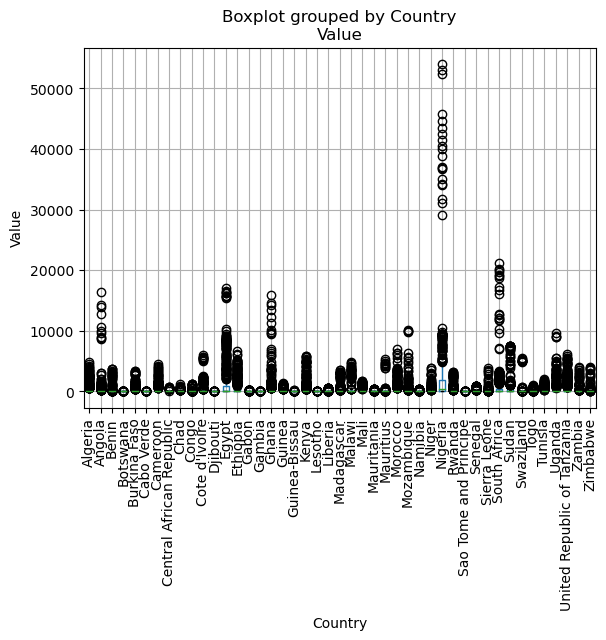

In [64]:
# checking for outlires in the food production data
plt.figure(figsize=(12, 10))
box_plot = food_production.boxplot(column ='Value', by='Country', vert = True)
plt.xticks(rotation = 90)
plt.xlabel('Country')
plt.ylabel('Value')
plt.show()


##### Above, it can be seen that there may be outliers sitting in the food production dataset, especially in Nigeria. in order to confirm,  calculation has to be done.

In [11]:
# calculating to identify if there are outliers
Q1 = food_production['Value'].quantile(0.25)
Q3 = food_production['Value'].quantile(0.75)
print(Q1)
Q3

3.0


108.0

In [12]:
IQR = Q3 - Q1
IQR

105.0

In [13]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound)
print(upper_bound)

-154.5
265.5


In [14]:
outliers = food_production[(food_production['Value']< lower_bound) | (food_production['Value'] > upper_bound)]
outliers.shape

(3696, 4)

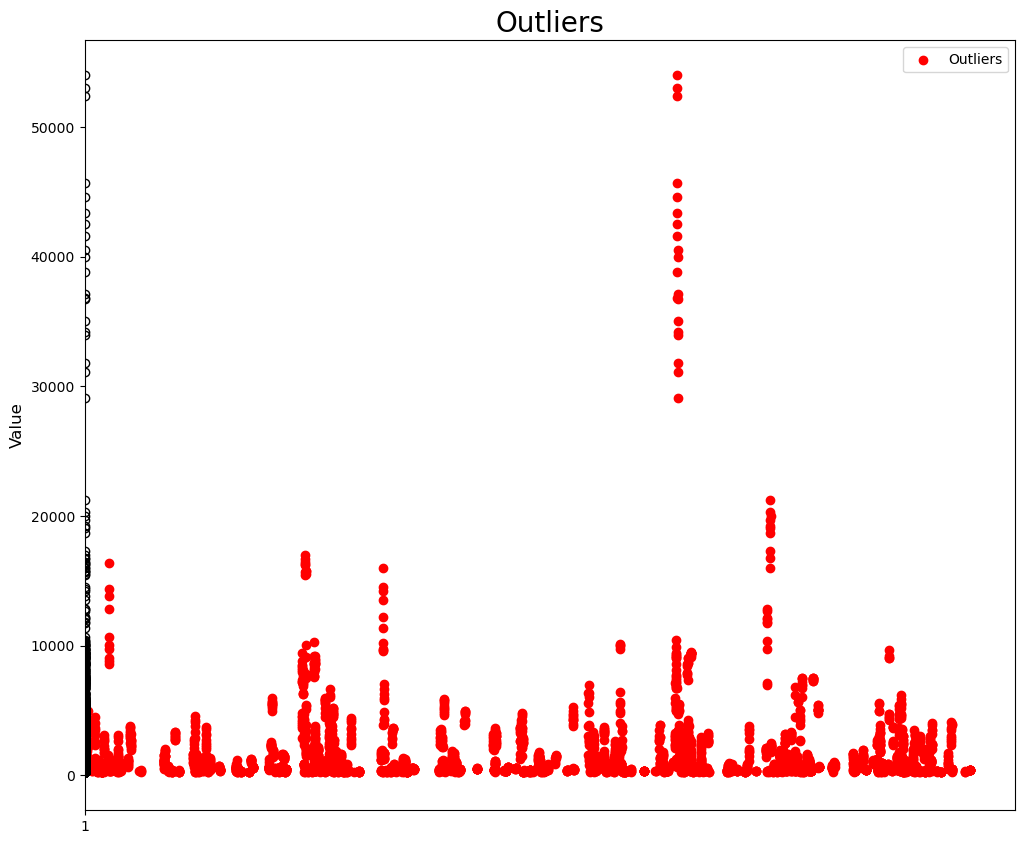

In [69]:
# identifying the outliers
plt.figure(figsize=(12, 10))
plt.boxplot(food_production['Value'])
plt.scatter(outliers.index +1, outliers['Value'], color = 'red', label = 'Outliers')
plt.title('Outliers', size = 20)
plt.ylabel('Value', size = 12)
plt.legend()
plt.show()


##### Above, it has been confirmed that outliers exists in the food production dataset, and has been visualized.

In [16]:
# using the outliers data to show the top 10 countries that produces the most items
outliers1 = outliers.groupby('Country')['Value'].sum().nlargest(10).reset_index()
outliers1

,Country,Value
0,Nigeria,1606835
1,Egypt,854498
2,South Africa,554473
3,Ethiopia,327310
4,United Republic of Tanzania,308293
5,Sudan,278942
6,Ghana,267985
7,Uganda,253248
8,Morocco,250419
9,Kenya,235633


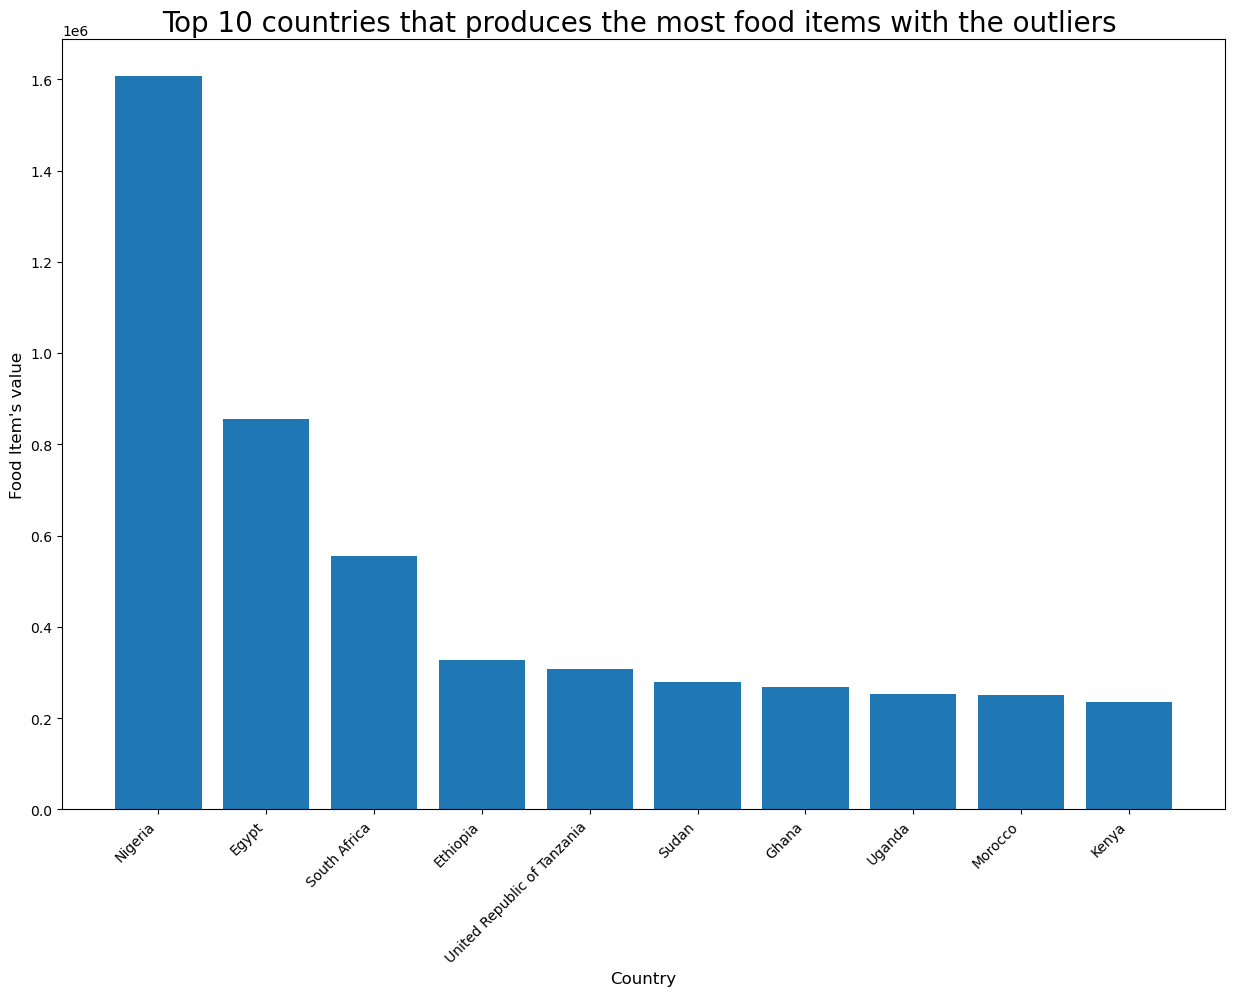

In [97]:
# Top 10 countries that produces the most food items using the outliers data
fig = plt.figure(figsize = (15,10))
plt.bar(outliers1['Country'], outliers1['Value'])
plt.title('Top 10 countries that produces the most food items with the outliers ', size = 20)
plt.xlabel('Country', size = 12)
plt.ylabel('Food Item\'s value', size = 12)
plt.xticks(rotation = 45, ha = 'right')
plt.show()

##### Using the outliers data, top countries that produces food items were visualized, and Nigeria seem to be leading, followed by Egypt, South Africa and the rest.

In [98]:
# using the outliers data to show the top 10 items produced the most 
outliers2 = outliers.groupby('Item')['Value'].sum().nlargest(10).reset_index()
outliers2

,Item,Value
0,Cassava and products,1109427
1,Sugar cane,875351
2,Maize and products,564734
3,Yams,503909
4,"Vegetables, Other",390756
5,Milk - Excluding Butter,361794
6,Sorghum and products,225021
7,Wheat and products,223608
8,"Beverages, Fermented",212393
9,Potatoes and products,209755


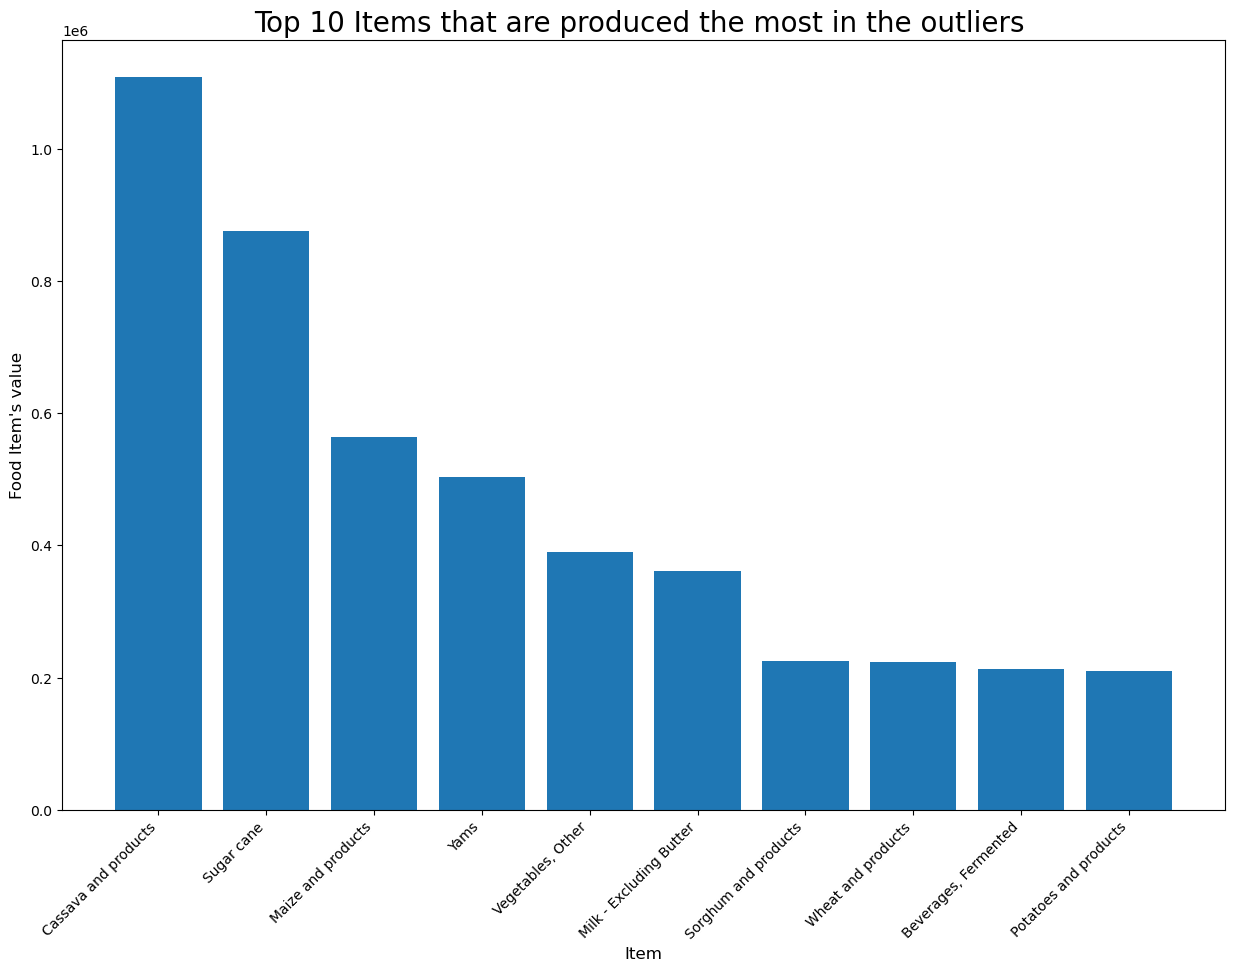

In [100]:
# Top 10 item that are produced the most 
fig = plt.figure(figsize = (15,10))
plt.bar(outliers2['Item'], outliers2['Value'])
plt.title('Top 10 Items that are produced the most in the outliers ', size = 20)
plt.xlabel('Item', size = 12)
plt.ylabel('Food Item\'s value', size = 12)
plt.xticks(rotation = 45, ha = 'right')
plt.show()

##### Using the outlier data, the top 10 most produced food itemes were visualized, and Cassava and products seems to be the most produced food items, followed by Sugar cane, maize and products, and so on.

In [18]:
#using the food production data to show the top 10 countries with the highest food production 
top_producing_countries = food_production.groupby(['Country'])['Value'].sum().nlargest(10).reset_index()
top_producing_countries

,Country,Value
0,Nigeria,1628030
1,Egypt,877498
2,South Africa,579592
3,Ethiopia,350693
4,United Republic of Tanzania,332802
5,Sudan,301584
6,Ghana,295004
7,Uganda,278421
8,Morocco,271821
9,Kenya,256872


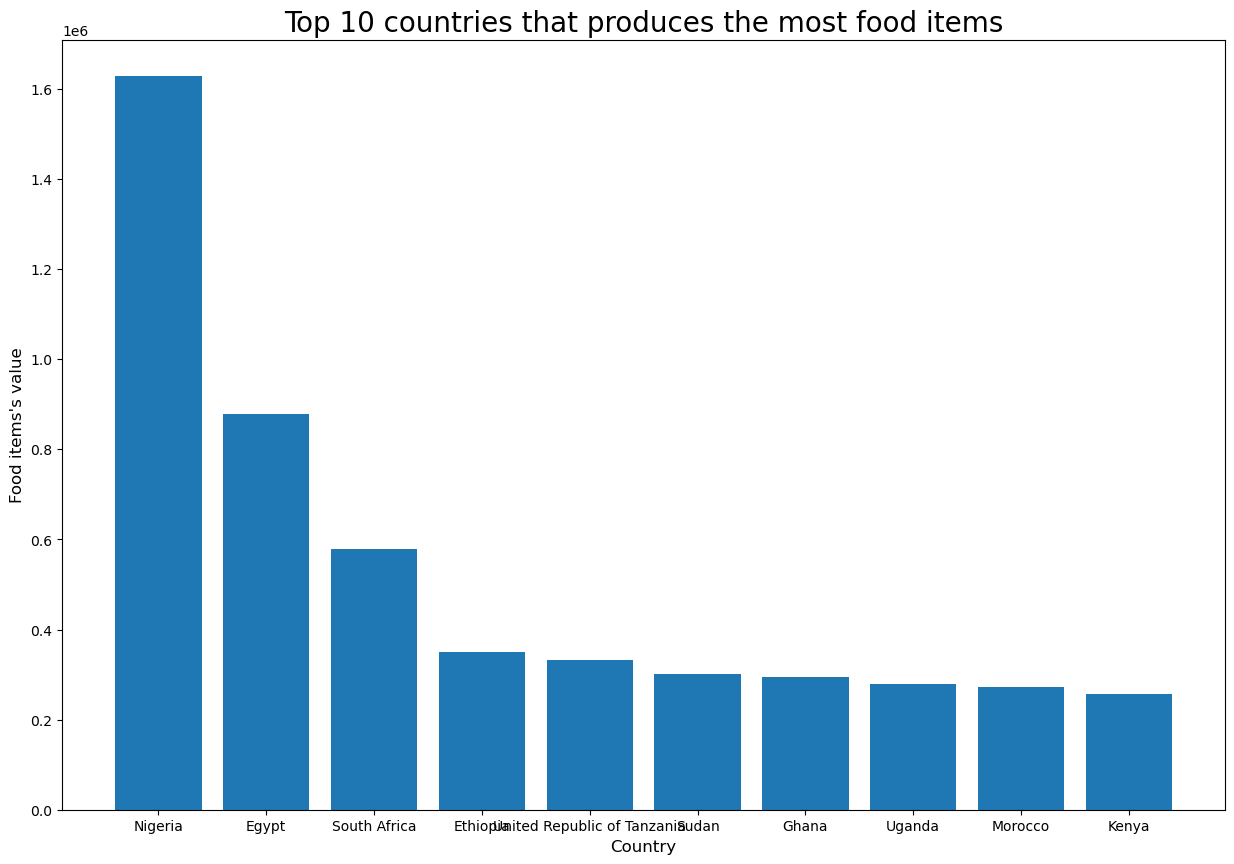

In [77]:
# top 10 producing countries
fig = plt.figure(figsize = (15,10))
plt.bar(top_producing_countries['Country'], top_producing_countries['Value'])
plt.title('Top 10 countries that produces the most food items', size = 20)
plt.xlabel('Country', size = 12)
plt.ylabel('Food items\'s value', size = 12)
plt.show()

##### using the whole data, it was confirmed that the countries that produces the most food items using just the outliers data, are thesme countries using the whole datasets, with Nigeria as the first, Egypt second and other follow.

In [ ]:
#using the food supply data to show the top 10 countries with the highest food consumption
top_consuming_countries = food_supply.groupby(['Country'])['Value'].sum().nlargest(10).reset_index()
top_consuming_countries

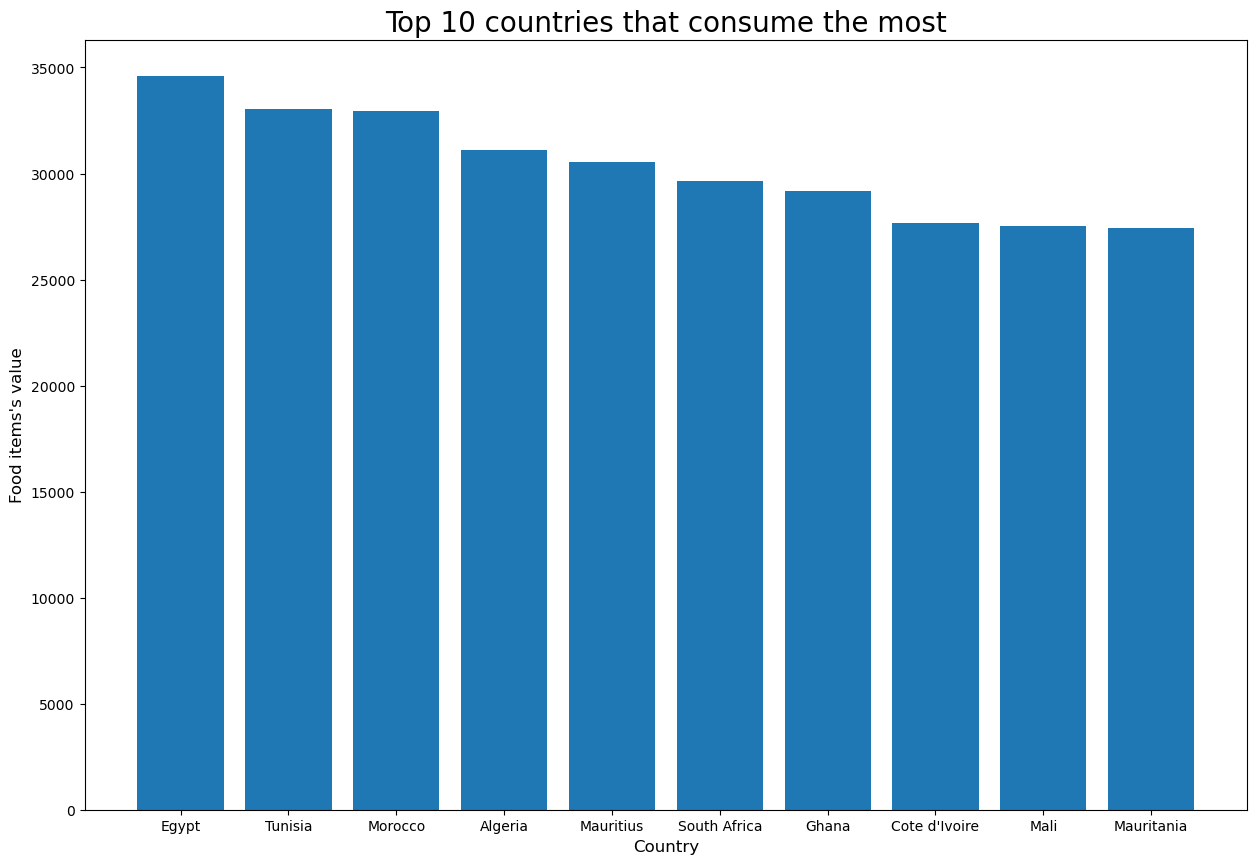

In [80]:
# top 10 consuming countries
fig = plt.figure(figsize = (15,10))
plt.bar(top_consuming_countries['Country'], top_consuming_countries['Value'])
plt.title('Top 10 countries that consume the most', size = 20)
plt.xlabel('Country', size = 12)
plt.ylabel('Food items\'s value', size = 12)
plt.show()

##### It can be seen above that Egypt is the country that consumes the most food Items, followed by Tunisia, Morocco and others.

In [22]:
# using the food production data to show the top 10 most produced food items 
top_producing_items = food_production.groupby('Item')['Value'].sum().nlargest(10).reset_index()
top_producing_items

,Item,Value
0,Cassava and products,1118948
1,Sugar cane,887008
2,Maize and products,574948
3,Yams,511523
4,"Vegetables, Other",410403
5,Milk - Excluding Butter,380380
6,Sorghum and products,241080
7,Wheat and products,229875
8,"Beverages, Fermented",227037
9,Potatoes and products,221092


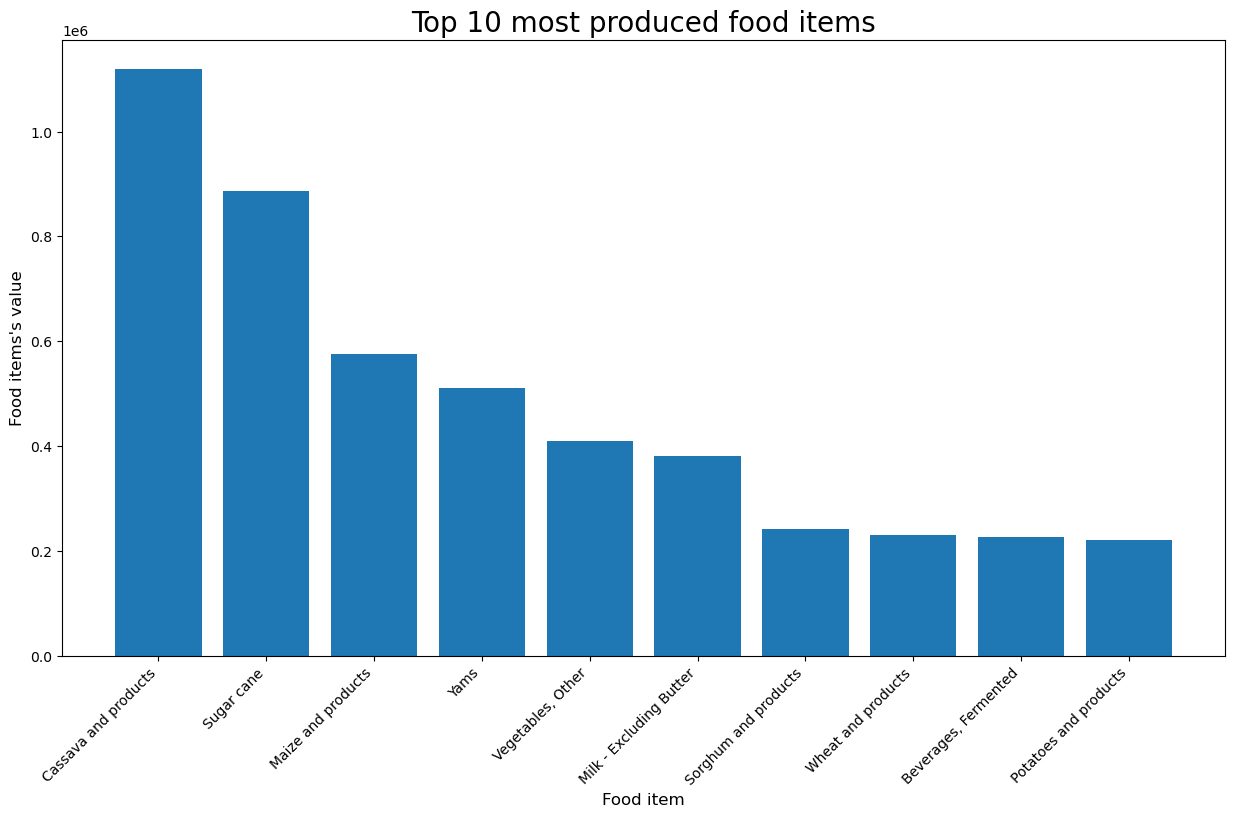

In [81]:
# most produced food items
fig = plt.figure(figsize = (15,8))
plt.bar(top_producing_items['Item'], top_producing_items['Value'])
plt.xticks(rotation = 45, ha = 'right')
plt.title('Top 10 most produced food items', size = 20)
plt.xlabel('Food item', size = 12)
plt.ylabel('Food items\'s value', size = 12)
plt.show()

##### Using the food production dataset, it has been confirmed that the food items that are consumed the most using the outliers data, are the same food items in the exact order using the whole data, with Cassava and products as the most produced food items, followed by Sugar cane and the rest.

In [24]:
#uing the food production data to show the top 10 averagely produced items
avg_production_items = food_production.groupby(['Item'])['Value'].mean().nlargest(10).reset_index()
avg_production_items

,Item,Value
0,Cassava and products,3390.751515
1,Sugar cane,2463.911111
2,Yams,2435.823810
3,Sugar beet,1742.600000
4,Maize and products,1337.088372
5,Plantains,1245.166667
6,"Vegetables, Other",912.006667
7,Wheat and products,851.388889
8,Milk - Excluding Butter,845.288889
9,"Beverages, Fermented",756.790000


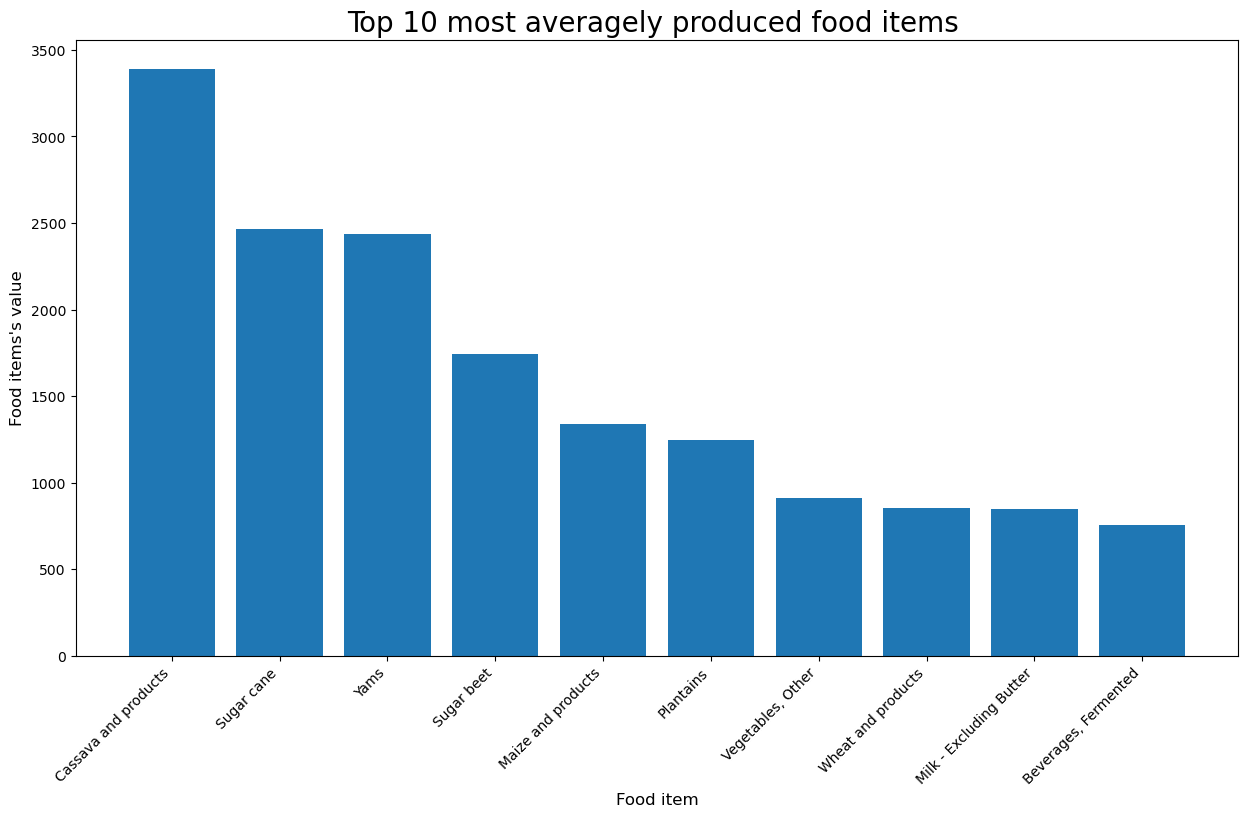

In [82]:
#Average food production by item
fig = plt.figure(figsize = (15, 8))
plt.bar(avg_production_items['Item'], avg_production_items['Value'])
plt.xticks(rotation = 45, ha = 'right')
plt.title('Top 10 most averagely produced food items ', size = 20)
plt.xlabel('Food item', size = 12)
plt.ylabel('Food items\'s value', size = 12)
plt.show()


#####  On average, cassava and products are the most produced food items, followed by sugar cane, Yams and the rest.

In [26]:
# using the food production data to show the top 10 Median produced items 
median_production = food_production.groupby(['Item'])['Value'].median().nlargest(10).reset_index()
median_production

,Item,Value
0,Sugar cane,836.0
1,Cassava and products,807.5
2,Olives (including preserved),571.0
3,Maize and products,390.5
4,Plantains,334.0
5,"Vegetables, Other",267.0
6,Apples and products,150.0
7,Yams,148.5
8,Bananas,133.0
9,Milk - Excluding Butter,120.0


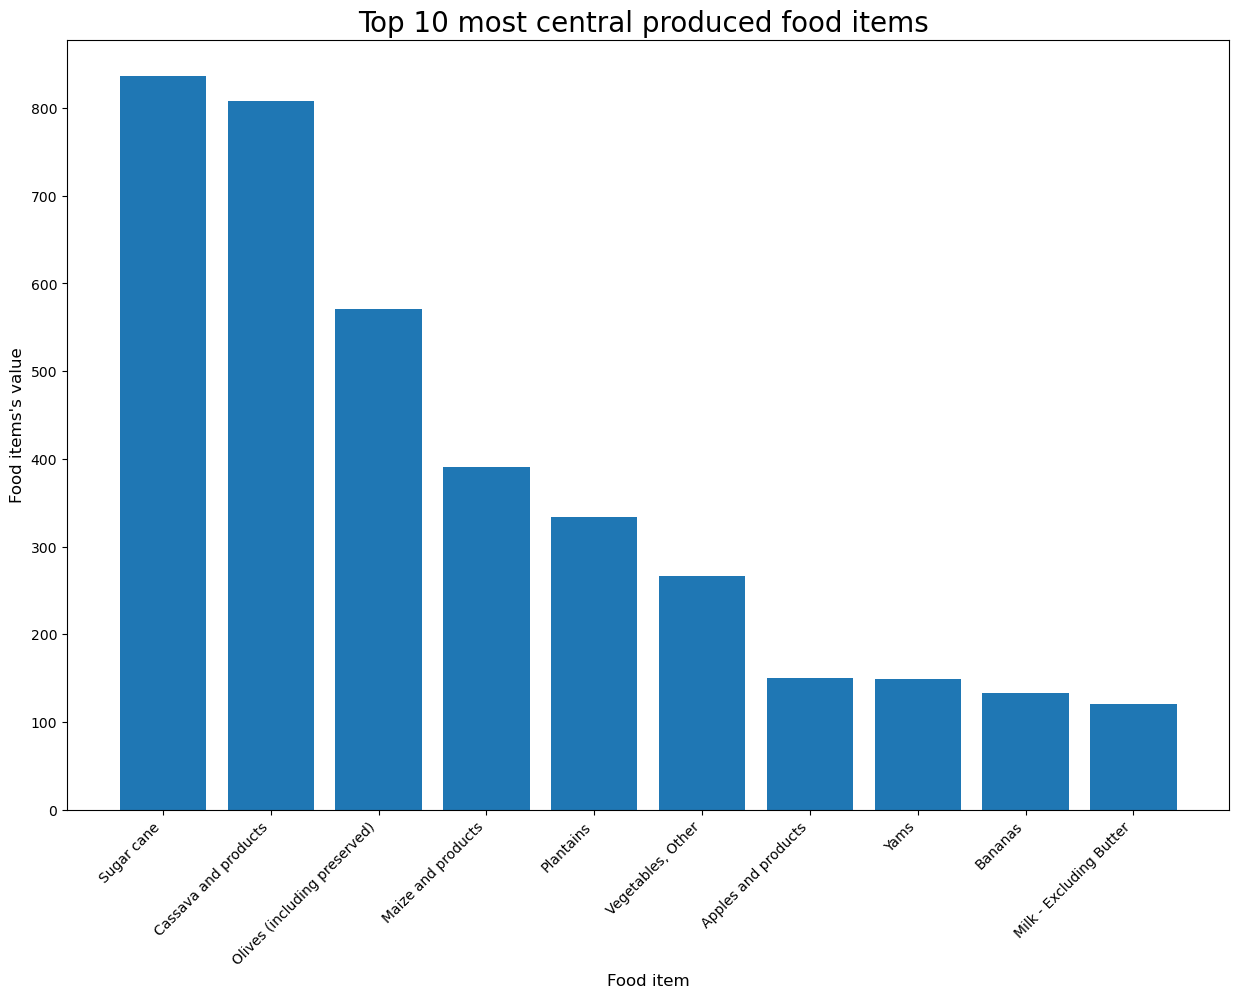

In [101]:
# Median produced food items
fig = plt.figure(figsize = (15,10))
plt.bar(median_production['Item'], median_production['Value'])
plt.xticks(rotation = 45, ha = 'right')
plt.title('Top 10 most central produced food items ', size = 20)
plt.xlabel('Food item', size = 12)
plt.ylabel('Food items\'s value', size = 12)
plt.show()

##### Centrally,  it can be seen that Sugar cane is the most produced food item, followed by cassava and products, then Olives and others.

In [28]:
# countries that produce the highest produced food items 
production_country = food_production.groupby(['Country', 'Item'])['Value'].sum().nlargest(15).reset_index()
production_country

,Country,Item,Value
0,Nigeria,Cassava and products,452881
1,Nigeria,Yams,349519
2,South Africa,Sugar cane,188396
3,Egypt,Sugar cane,160973
4,Ghana,Cassava and products,121026
5,Angola,Cassava and products,114286
6,South Africa,Maize and products,107343
7,Nigeria,"Beverages, Fermented",93839
8,Egypt,Tomatoes and products,85505
9,Egypt,"Vegetables, Other",85271


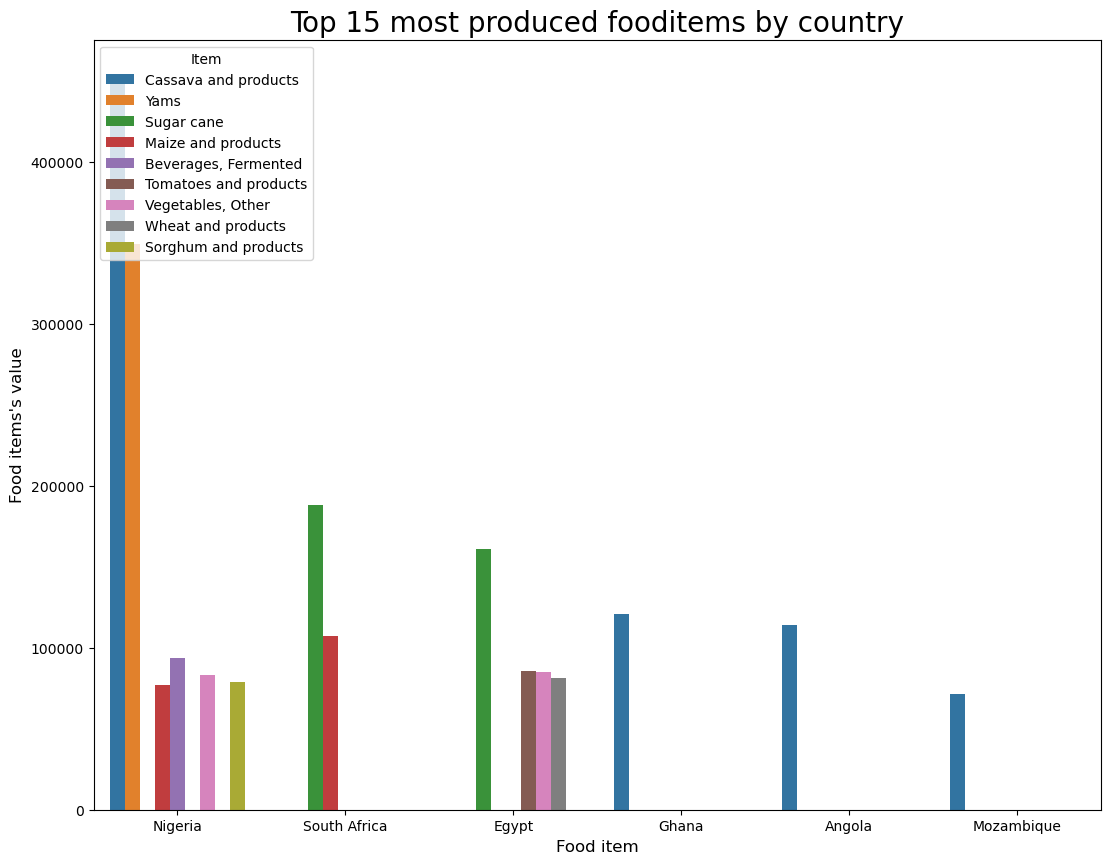

In [85]:
fig = plt.figure(figsize = (13,10))
sns.barplot(data = production_country, x = 'Country', y = 'Value', hue = 'Item', errorbar = None )
plt.title('Top 15 most produced fooditems by country', size = 20)
plt.xlabel('Food item', size = 12)
plt.ylabel('Food items\'s value', size = 12)
plt.show()

##### Here, it can be seen that the country that produces the most food items produces Cassava and Yam the most. Followed by South Africa that produces sugar cane in the highest quantity, then Egypt, that also produces sugar cane after south africa.

In [104]:
# production vs consumption by country
production_consumption = (food_production.groupby('Country')['Value'].sum() - food_supply.groupby('Country')['Value'].sum()).reset_index()
production_consumption = production_consumption.sort_values(by= 'Value', ascending = False)
production_consumption

,Country,Value
31,Nigeria,1601042
12,Egypt,842918
36,South Africa,549963
13,Ethiopia,330401
42,United Republic of Tanzania,311252
37,Sudan,278346
16,Ghana,265824
41,Uganda,256216
27,Morocco,238854
19,Kenya,235419


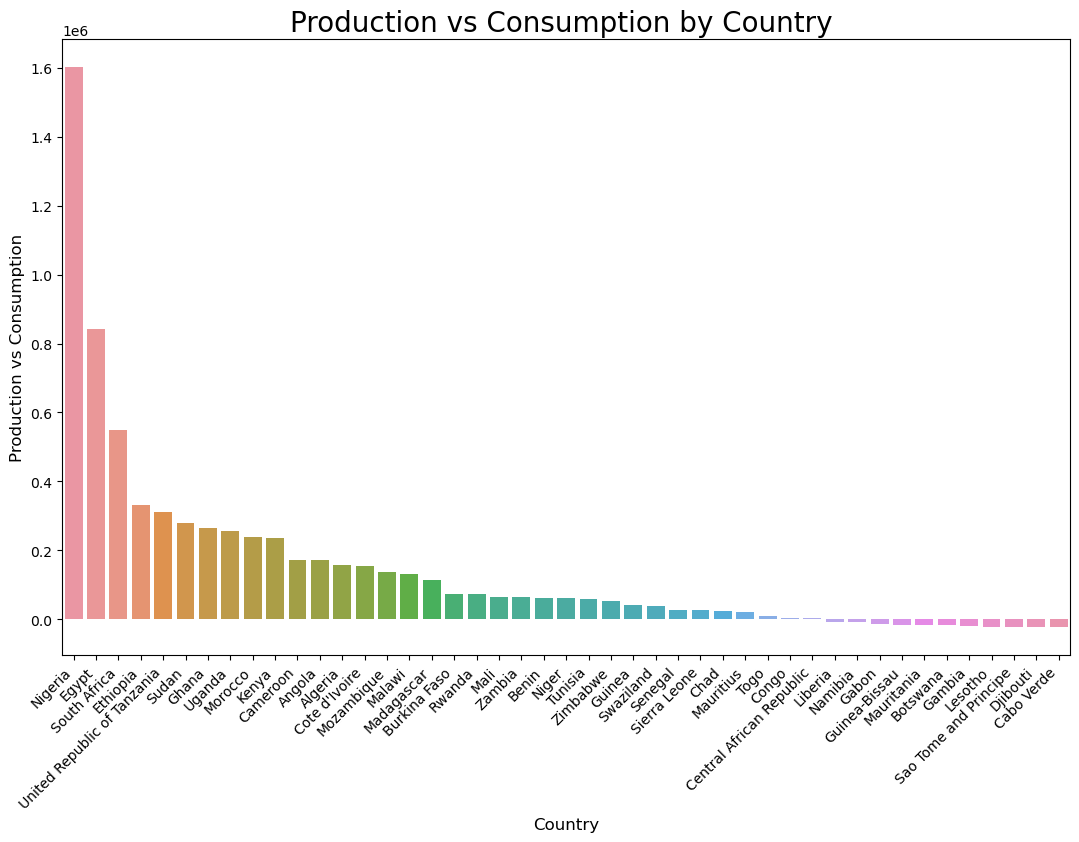

In [105]:
plt.figure(figsize = (13, 8))
sns.barplot(data = production_consumption, x = 'Country', y = 'Value', )
plt.xticks(rotation = 45, ha = 'right')
plt.title('Production vs Consumption by Country ', size = 20)
plt.xlabel('Country', size = 12)
plt.ylabel('Production vs Consumption', size = 12)
plt.show()

##### Nigeria produces more than it consumes, Egypt, south Africa, Ethiopia and the rest. While Cabo Verde, consumes morethan it produces the most, followed by Djibouti, and the rest.

In [33]:
#showing the food production overtime
year_production = food_production.groupby('Year')['Value'].sum().reset_index()
year_production

,Year,Value
0,2004,663006
1,2005,691257
2,2006,718602
3,2007,705659
4,2008,736804
5,2009,746870
6,2010,786466
7,2011,812214
8,2012,841667
9,2013,872571


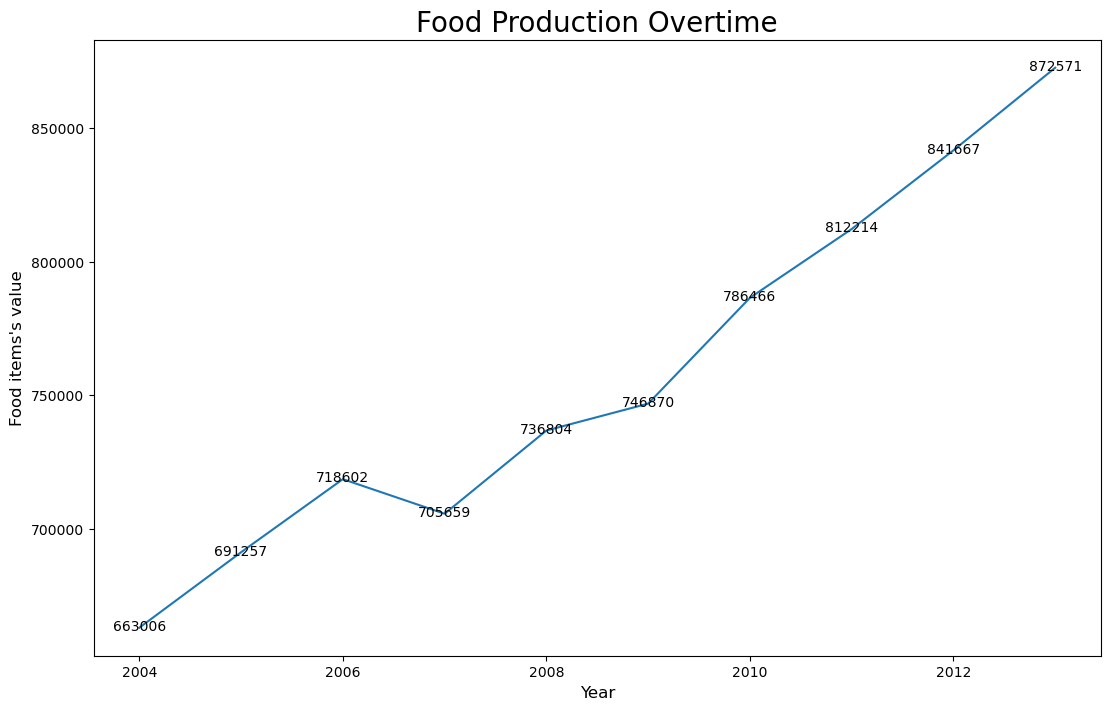

In [90]:
# food production overtime 
plt.figure(figsize = (13, 8))
sns.lineplot(data = year_production, x = 'Year', y = 'Value')
for x,y in zip(year_production['Year'], year_production['Value']):
    plt.annotate(f'{y}', (x, y), ha='center', va='top', xytext=(0, 6), textcoords='offset points')
plt.title('Food Production Overtime', size = 20)
plt.xlabel('Year', size = 12)
plt.ylabel('Food items\'s value', size = 12)
plt.show()

##### Food production has consistently been rising by each year, except for 2007 that it went down compred to the year before it.

In [36]:
# showing food consumption overtime
year_supply = food_supply.groupby('Year')['Value'].sum().reset_index()
year_supply

,Year,Value
0,2004,107740
1,2005,108418
2,2006,109386
3,2007,110149
4,2008,110734
5,2009,111700
6,2010,112383
7,2011,113194
8,2012,113744
9,2013,113951


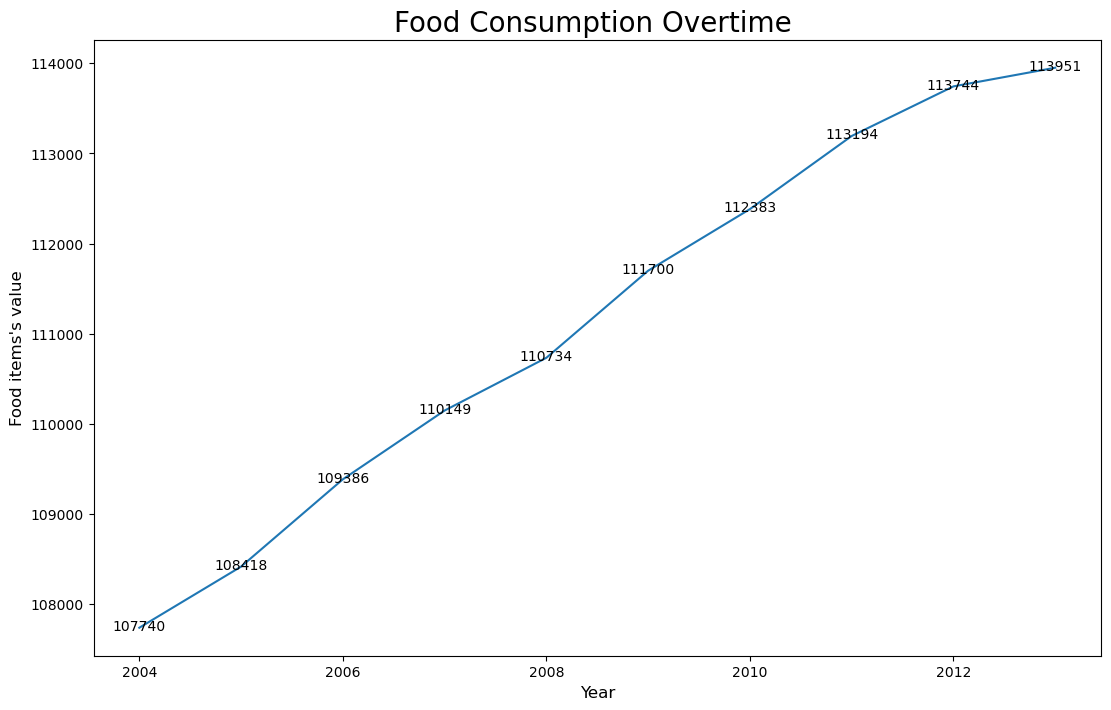

In [93]:
# food consumption overtime 
plt.figure(figsize = (13, 8))
sns.lineplot(data = year_supply, x = 'Year', y = 'Value')
for x,y in zip(year_supply['Year'], year_supply['Value']):
    plt.annotate(f'{y}', (x, y), ha='center', va='top', xytext=(0, 6), textcoords='offset points')
plt.title('Food Consumption Overtime ', size = 20)
plt.xlabel('Year', size = 12)
plt.ylabel('Food items\'s value', size = 12)
plt.show()

##### Food conumption has conistently been rising as the years go by.

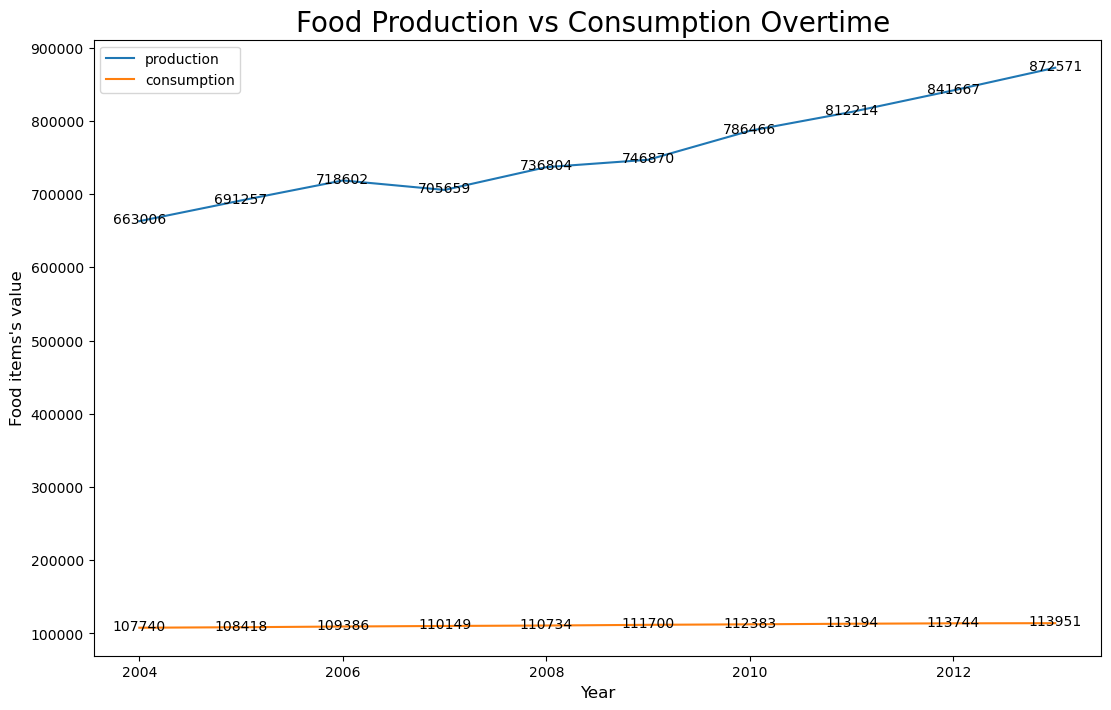

In [95]:
# food production vs consumption overtime
plt.figure(figsize = (13, 8))
sns.lineplot(data = year_production, x = 'Year', y = 'Value', label = 'production')
for x,y in zip(year_production['Year'], year_production['Value']):
    plt.annotate(f'{y}', (x, y), ha='center', va='top', xytext=(0, 6), textcoords='offset points')
sns.lineplot(data = year_supply, x = 'Year', y = 'Value', label = 'consumption')
for x,y in zip(year_supply['Year'], year_supply['Value']):
    plt.annotate(f'{y}', (x, y), ha='center', va='top', xytext=(0, 6), textcoords='offset points')
plt.title('Food Production vs Consumption Overtime ', size = 20)
plt.xlabel('Year', size = 12)
plt.ylabel('Food items\'s value', size = 12)
plt.show()

##### Food consumption, no way nears food production. Africa at large produces more food items than it consumes, even though some food items are produced in large quantities.

## Conclusion

##### There is abundant food production, but mostly coming from certain countries, and mostly a few number of the food items are in abundance


### Recommendations

##### 1. Diverse food production should be encourged to avoid too much dependent on a number of countries for supply of certain food. 
##### 2. The distribution of food should be enhanced to be sure that the food items produced in abundace reach other areas for consumption.
##### 3. Policies should be implemented that will tackle the differences in food production and consumption, making sure that their is balanced nd fair distribution of food items
##### 4. Frmers should be educated and empoered with the knowledge to improve production of food. 